In [6]:
%pylab 
%matplotlib inline
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# What do probability statements *mean*?

Suppose say we have a "fair" coin. What does the satement "the probability of it landing heads is 0.5" mean? 

Intuitively, we tend to explain this in terms of frequency. Let's see how this may play out.

Note: We represent the results of flipping the coin as 0 and 1, and use Python's randint() function to simulate coin flipping. 

In [7]:
[randint(2) for x in range(5)]

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
4
4


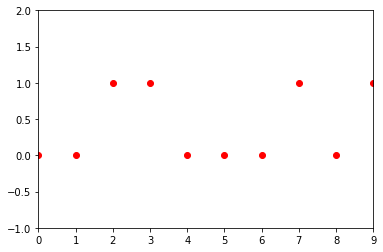

In [8]:
run = 10
experiment = [randint(2) for x in range(run)]
print experiment
print sum(experiment)
print experiment.count(1)
plt.plot(range(run),experiment,'ro')
plt.axis([0,run-1,-1,2]);

Let's check how the total number of heads is distributed. We will toss the coin 100 times, and repeast the experiment 1000 times.

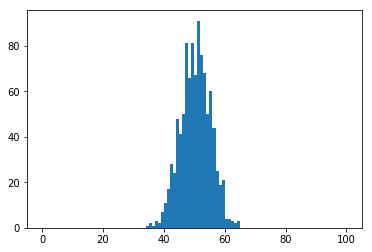

In [9]:
tosses = 100
trials = 1000
tests = [[randint(2) for _ in range(tosses)].count(0) for _ in range(trials)]
plt.hist(tests,bins=tosses,range=[0,tosses]);

Studying these trends we may want to look at prefixes of each trial of coing tossings.

In [10]:
def prefixes(lst):
    return [lst[:i] for i in range(1,len(lst)-1)]

In [11]:
tosses=10
tests = [randint(2) for _ in range(tosses)]
prefixes(tests)

The number of zeros increases, of course, as the trial proceeds. But we are after their frequency.

In [12]:
[x.count(0) for x in prefixes(tests)]

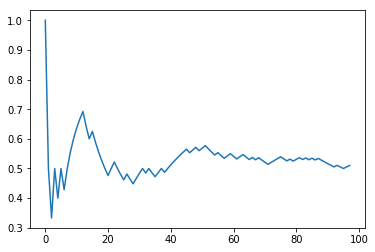

In [13]:
tosses=100
tests = [randint(2) for _ in range(tosses)]
plot([x.count(0)/float(len(x)) for x in prefixes(tests)]);

The empirical result seems to converge to around 1/2, but 100 trials do not seem to be enough to get very close.

It is also natural to wonder if all four *pairs* of tosses are equally likely:

In [14]:
def pairs(lst):
    for i in range(len(lst)-1):
        yield lst[i:i+2]

In [15]:
tosses=3
tests = [randint(2) for _ in range(tosses)]
print tests
print list(pairs(tests))

[1, 0, 0]
[[1, 0], [0, 0]]


In [16]:
tosses=100
tests = [randint(2) for _ in range(tosses)]
pairs_count = {'[0, 0]':0,'[0, 1]':0,'[1, 0]':0,'[1, 1]':0}
for p in pairs(tests):
    pairs_count[str(p)]+=1
print sum(pairs_count.values()),sum(pairs_count.values())/4.0
pairs_count

99 24.75


{'[0, 0]': 16, '[0, 1]': 22, '[1, 0]': 23, '[1, 1]': 38}

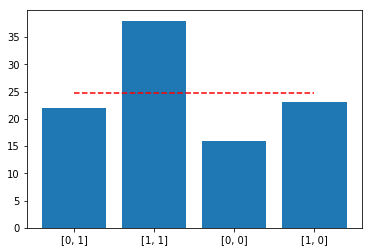

In [17]:
plt.bar(range(len(pairs_count)),pairs_count.values(),align="center")
plt.xticks(range(len(pairs_count)),pairs_count.keys());
avg=sum(pairs_count.values())/4.0
plt.plot([0,3],[avg,avg],'r--');

Here, too, we find what seems like a large deviation from average value of 24.75. 

Last, we check *when* the first 0 occurs in each trial.

In [18]:
tosses =  20
trials = 30
tests = [[randint(2) for _ in range(tosses)] for _ in range(trials)]
print [x.index(0)+1 for x in tests]

[1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 3, 1, 5, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1]


Let's just say that frequency is better in theory than in practice... Or maybe as an ideal scenario for understanding the kind of probability statement we discussed so far. But, even in theory the frequency intepretation has its issues. Consider:

(1) The probability that it will rain Tueday is 85%.
(2) The probability that next toss will be heads is 0.5.

Clearly it will either rain or not! It's not "in between". Moreover, how can such a statement be intereted in terms of frequencies? This problem (which easily generalizes) is called the problem of single case probabilities.

Which leads to the alternative interpretation of probabilities as "degrees of belief". But before moving to that, I quickly mention that our frquency experiments can also be understood as stemming from something more fundamental. They seem to try to capture the idea that the tosses are independent of one another (think of the experiment concerning the frequcny of pairs), and indeed that the tosses are identically distributed. The idea that absent any reason to favor some options over others the probability is equally divided among all possibilites underlies what is commonly referred to as the **classical interpretation** of probability.  It is summarized definitevely by Pierre-Simon Laplace in 1814:

>The theory of chance consists in reducing all the events of the same kind to a certain number of cases equally possible, that is to say, to such as we may be equally undecided about in regard to their existence, and in determining the number of cases favorable to the event whose probability is sought. The ratio of this number to that of all the cases possible is the measure of this probability, which is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible. 

This alows us to do nifty probability calculations simply by counting the relevant cases. I am not going to elaborate since there is an inspiring executable introduction to how this is done from Peter Norvig: [A Concrete Introduction to Probability (using Python)](http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb).

What is key for us is that the classical interpretation relies the *principle of indifference* according to which absent any evidence probability should be distributed evenly. This seems to underlie our intuition that the probability of heads is 1/2. However, this seems to require further argument, since -- as critics have pointed out -- it seems that we deduce knowledge about the probability out of our very ignorance! (More on this in the further reading.)

## Summary of probabilities


$P(A) \in [0,1]$

$P(not A) = 1-P(A)$

$P(A \cup B) = P(A)+P(B) - P(A \cap B)$  ($\cup$ is set union, you can think of it as "OR")

$P(A \cap B) = P(A)P(B)$ if A and B are independent ($\cap$ is set intersction, you can think of it  as "AND")

$P(A | B)$ = $P(A \cap B) \over P(B)$ (this is _conditional probability_: the probability of A given that B)


$P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)$



## Bayes

This difficult suggests we return to the idea already hinted at: interpreting probability subjectively, as the degrees of belief an agent has. This is typically cashed out in terms of betting (the classic formulation comming from de Finetti (1980)). It amounts to the following claim:

> Your degree of belief in E is p iff p units of utility is the price at which you would buy or sell a bet that pays 1 unit of utility if E, 0 if not E.

It can be easily proved that  if the the bettor's assignment of probabilties does not follow the axioms of probability they can be driven bankrupt. To be coherent (which seems to be at least necessary for rationality), agents must conform to laws of probability. 

In [19]:
import sympy as sm
sm.init_printing()
from sympy.abc import  a, b
Pa,Pb, Pa_b,Pb_a = sm.symbols('Pa,Pb,Pa_b,Pb_a',cls=sm.Symbol)
Pab, Pba = sm.symbols('Pab,Pba',cls=sm.Function)

In [20]:
Pab = Pa*Pb_a
Pab

In [21]:
Pba = Pb*Pa_b
Pba

Since Pab and Pba are equal (A&B is the same as B&A), we equate them and solve of Pa_b (probability of A given B).

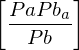

In [22]:
sm.solve(Pab-Pba,Pa_b)

This derivation gives us Bayes's theorem:

$P(A|B)$ = ${P(B|A)P(A)} \over P(B)$

## First things to note!

1. Bayes's theorem allows us to move from $P(B|A)$ to $P(A|B)$. *If* we know the values for $P(A)$ and $P(B)$. The situation we are mostly concerned with is moving from $P(evidence|hypothesis)$ to $P(hypothesis|evidence)$. Just let the magic sink in for a minute!

2. We can also use the theorem as a rule for belief updating. Say $P(H)$ is the probability you assign H before seeing the data (this is called the **prior**), then the probability of H after seeing the data, $P(H|D)$ (the **posterior** probability) should be ${P(D|H)P(H)} \over P(D)$. The trick if to find $P(D)$. Can you guess how this is done?


## The Cookie problem

I will now work through some examples from [Allen Downey](https://github.com/AllenDowney/ThinkBayes).

Suppose there are two bowls of cookies:

Bowl 1: 10 chocolate, 30 vanilla
Bowl 2: 20 chocolate, 20 vanilla

You pick one bowl at random, and one cooke from it. It is vanilla. What's the probability that you picked bowl 1?

H: The hypothesis that it is bowl 1.
D: Cookie is vanilla.

P(H) = 1/2 **WHY?**

So what is $P(H|D)$?

$P(H|D)$ = ${P(D|H)P(H)} \over {P(D)}$

$P(D|H)$ = 3/4

P(D) = 5/8 **WHY?**

Combining, we get:

$P(H|D)=(3/4)(1/2)/(5/8)=3/5$

So we should now assign 60%, rather than 50% to the bowl being bowl 1.

**The reason is simple: since H makes D more likely, evidence of D increases our confidence in H.**

**Notice that we needed the prior to do the calculation. A key contention of the Bayesian approach is that "you do not get probabilities out, unless you put probabilties in."

In [25]:
from __future__ import print_function, division

import math
import numpy as np

from thinkbayes2 import Pmf, Suite
import thinkplot

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

cookie = Pmf(['Bowl 1', 'Bowl 2'])
cookie.Print()

Bowl 1 0.5
Bowl 2 0.5


Update each hypothesis with the likelihood of the data (a vanilla cookie).

In [26]:
cookie['Bowl 1'] *= 0.75
cookie['Bowl 2'] *= 0.5
cookie.Normalize()

In [27]:
cookie.Print()

Bowl 1 0.6
Bowl 2 0.4



## Coin problem

Assume a coin has a probability $x$ of landing heads. Based on the data of 140 heads and 110 tails what is $x$?

In [28]:
# Solution

class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        """ 
        hypo is the prob of heads (0-100)
        data is a string, either 'H' or 'T'
        """
        x = hypo / 100
        if data == 'H':
            return x
        else:
            return 1-x

We'll start with a uniform distribution from 0 to 100.

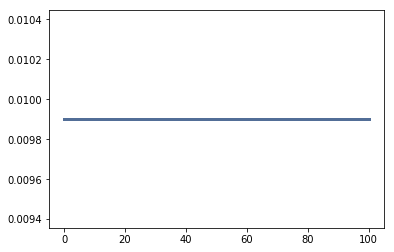

In [29]:
euro = Euro(range(101))
thinkplot.Pdf(euro)

Now we can update with a single heads:

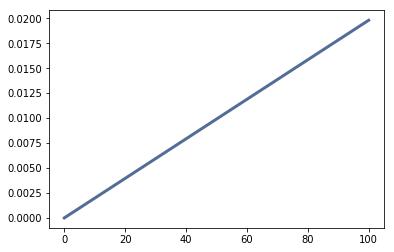

In [30]:
euro.Update('H')
thinkplot.Pdf(euro)

Another heads:

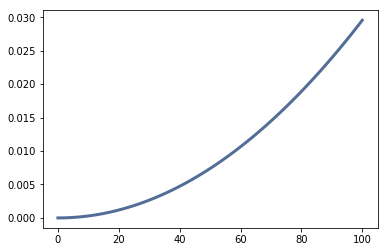

In [31]:
euro.Update('H')
thinkplot.Pdf(euro)

And a tails:

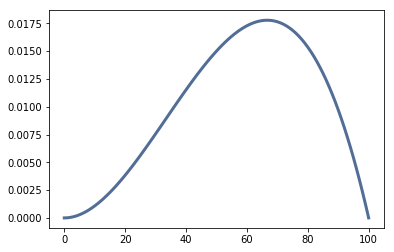

In [32]:
euro.Update('T')
thinkplot.Pdf(euro)

Starting over, here's what it looks like after 7 heads and 3 tails.

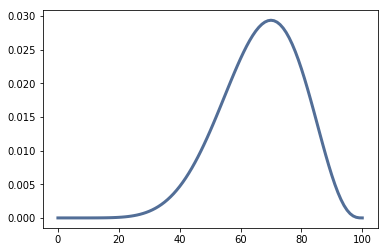

In [33]:
euro = Euro(range(101))

for outcome in 'HHHHHHHTTT':
    euro.Update(outcome)

thinkplot.Pdf(euro)
euro.MaximumLikelihood()

The maximum posterior probability is 70%, which is the observed proportion.

Here are the posterior probabilities after 140 heads and 110 tails.

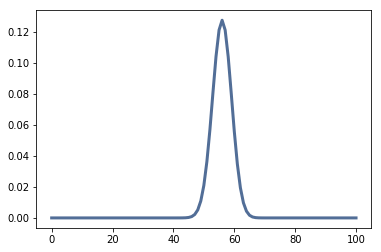

In [34]:
euro = Euro(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.Update(outcome)
    
thinkplot.Pdf(euro)

The posterior mean s about 56%

In [35]:
euro.Mean()

So is the value with maximum posterior probability.

In [36]:
euro.MaximumLikelihood()

The posterior credible interval has a 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).

In [37]:
euro.CredibleInterval(90)

### Some lessons

1. The prior is needed, but is all but washed out by data.

2. The result is a posterior **distribution**, not a single number. We can summarize it by choosing the mean or the value with the maximum likelyhood, but when we do so we loose information.

# Law of Likelihood

> The observation O favors hypothesis $H_1$ over $H_2$ iff $P(O|H_1) > P(O|H_2)$. 

> The degree to which O favors $H_1$ is $P(O|H_1) \over P(O|H_2)$

# Related reading

* SEP entry on [Interpretations of Probability](http://plato.stanford.edu/entries/probability-interpret/).